In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:/python test/aug23/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [48]:

print( df.shape)


(6607, 20)


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [50]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [51]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours

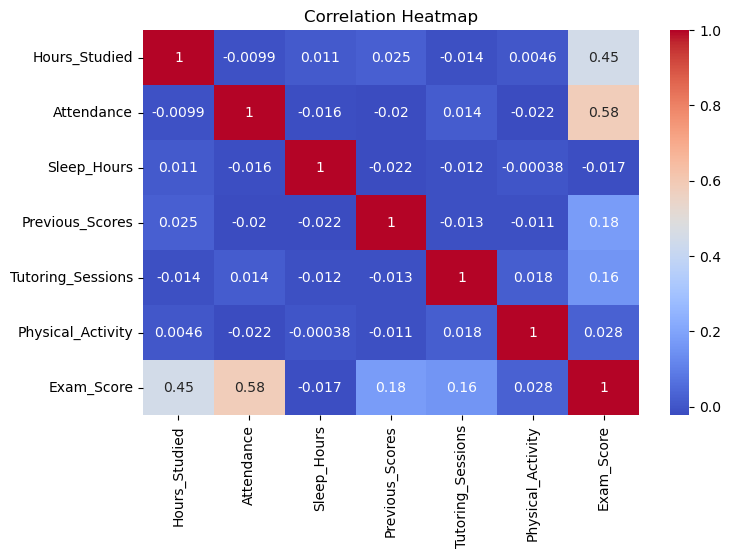

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


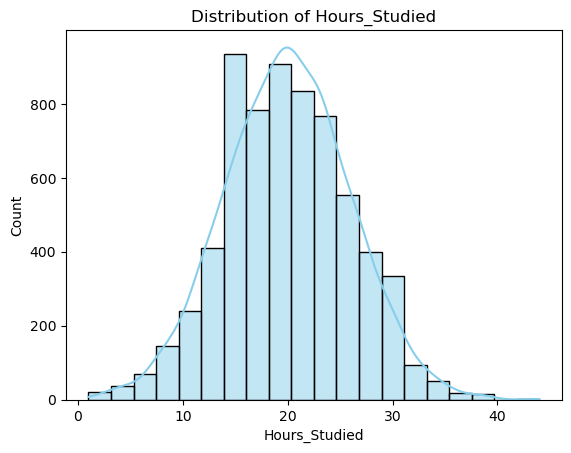

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['Hours_Studied'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Hours_Studied")
plt.show()


In [56]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

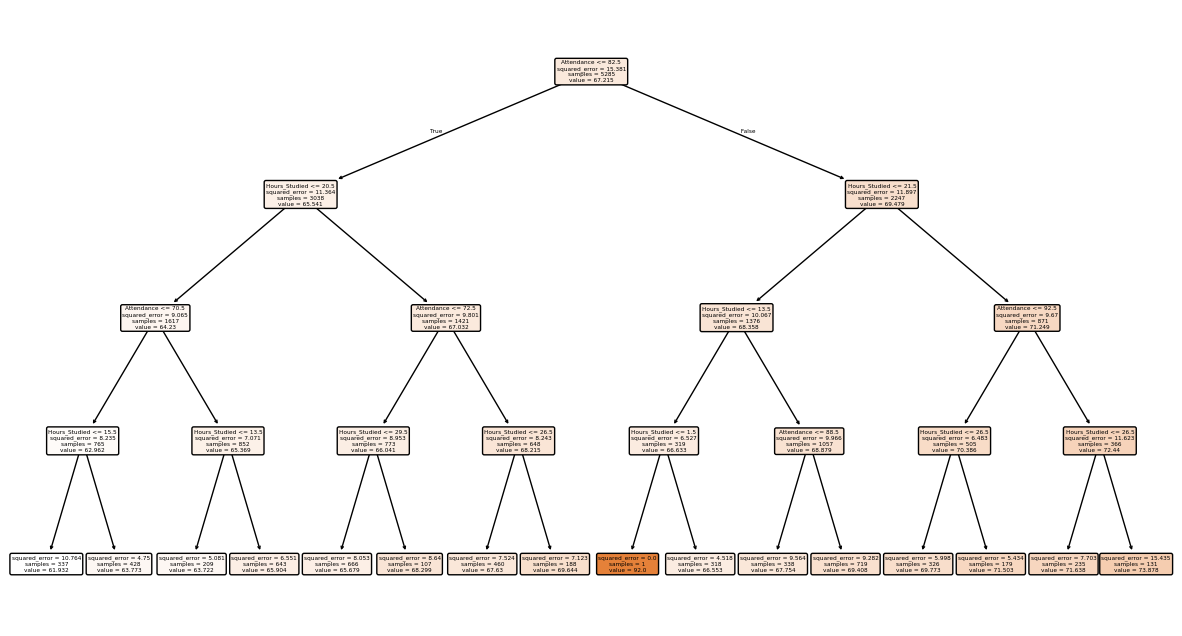

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


df2 = df.copy()
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == "object":
        df2[col] = le.fit_transform(df2[col])

X = df2.drop("Exam_Score", axis=1)
y = df2["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("StudentPerformanceFactors.csv")


X = df[["Hours_Studied", "Sleep_Hours", "Attendance"]]
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

student = pd.DataFrame([[0, 14,70]], columns=["Hours_Studied", "Sleep_Hours", "Attendance"])
predicted_score = model.predict(student)[0]

print("Predicted Exam Score:", predicted_score)


result = "Pass" if predicted_score >= 70 else "Fail"
print("Predicted Result:", result)


Predicted Exam Score: 61.0
Predicted Result: Fail


In [ ]:
from collections import Counter
print(Counter(y)) 

Counter({68: 759, 66: 751, 67: 717, 65: 679, 69: 624, 70: 542, 64: 501, 71: 408, 63: 371, 72: 304, 62: 264, 61: 171, 73: 141, 74: 106, 60: 77, 75: 48, 59: 40, 58: 22, 76: 16, 80: 5, 77: 5, 78: 4, 86: 4, 94: 4, 82: 4, 57: 4, 79: 3, 89: 3, 97: 3, 84: 3, 88: 3, 98: 3, 92: 2, 99: 2, 87: 2, 95: 2, 93: 2, 100: 1, 83: 1, 55: 1, 101: 1, 91: 1, 96: 1, 85: 1, 56: 1})
